<b>Recap</b>

Criterion of selection of mule accounts:
<ul>
<li>Mentioned at least 3 times in the master list</li>
<li>Tagged as MR or empty</li>
<li>unique NRIC no. / Passport No. and Nationality (for foreigners) / Business or Company Registration No.</li>
</ul>

Details:
<ul>
    <li>Number of unique selected mule accounts - 482</li>
<li>Number of subnetworks - 377</li>
    <li>Selected mule accounts are annotated as targets</li>
</ul>
    
Network characteristics about selected mule accounts in the list - targets: 
<ul>
<li>interconnected targets</li> 
<li>connections to selected offenses</li>
<li>targets sharing contact/email</li>
<li>targets connected via employer relationship</li>
<li>connections to high number of STR</li> 
<li>connections to high amount STR in total</li> 
<li>connections to high amount CTR in total</li> 
</ul>

4 highlighted features in priority order
<ul>
<li>interconnected targets</li> 
<li>targets connected via employer relationship</li>
<li>whether targets share contact/email/address</li>
<li>connections to high number of STR</li>
</ul>

<b>Proposal</b>

In [1]:
from IPython.display import display, Math, Latex
import pandas as pd
from Script.helper_v2 import *
import json
import re
import numpy as np
from Script.generateHtml_v4 import generateHtml
import matplotlib.pyplot as plt
from collections import OrderedDict
%matplotlib inline

#adjust font size of graph
plt.rcParams.update({'font.size': 25})

In [2]:
#load csv - subgraphs perspective
# csvFile = "D:/Users/figohjs/Documents/Network/data/interim/2020-08-19_482ID_SubGraphDF.csv"
csvFile = "D:/Users/figohjs/Documents/Network/data/interim/2020-08-26_482ID_SubGraphDF.csv"
colList = ['NeoIds', 'targetMuleAccountNeoIds', 'numberTarget', 'numTargetConAsEmployer', 'targetSharingContact', 'numStr']
# df = pd.read_csv(csvFile, usecols = colList)
df = pd.read_csv(csvFile)

#load json - network info
# jsonFile = "D:/Users/figohjs/Documents/Network/data/interim/2020-08-04_482ID_SubNet.json"
jsonFile = "D:/Users/figohjs/Documents/Network/data/interim/2020-08-26_482IDAddress_SubNet.json"
with open(jsonFile, 'r') as f:
    tempGraphDict = json.load(f)

#convert str to list - export issue 
def colBeList(colArray, colName):
    result = []
    for colList in [i.replace("{", '').replace('}', '')\
                     .replace("[", '').replace(']', '')\
                    .replace("\'", '').split(',') for i in colArray]:
        if colName in ['NeoIds', 'TransIds', 'targetMuleAccountNeoIds']:
            result.append([int(i.strip()) for i in colList])
        else:
            result.append([i.strip() for i in colList])
    return result

colList = ['NeoIds', 'TransIds', 'targetMuleAccountID', 'targetMuleAccountNeoIds']
for col in colList:
    if col in df.columns:
        df[col] = colBeList(df[col].values, col)

In [69]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

In [3]:
def getMaxNum(df):
    #get max of number of connected targets
    colName = 'numberTarget'
    maxNumTarget = max(df[colName])
    
    #get max of number of target connected via employer relationship
    colName = 'numTargetConAsEmployer'
    maxNumTargetEmployer = max(df[colName])
    
    #get number of connected str
    colName = 'numStr'
    maxNumStr = max(df[colName])
    
    resultDict = {'maxNumTarget':maxNumTarget,
                 'maxNumTargetEmployer':maxNumTargetEmployer,
                 'maxNumStr':maxNumStr}
    
    return resultDict

#get max num for each relevant metrics
maxResultDict = getMaxNum(df)

def getScore(x):
    weightage1 = 0.4
    weightage2 = 0.3
    weightage3 = 0.2
    weightage4 = 0.1
    
    return weightage1 * (x['numberTarget']/maxResultDict['maxNumTarget']) + weightage2 * (x['numTargetConAsEmployer']/maxResultDict['maxNumTargetEmployer']) \
           + weightage3 * x['targetSharingContactOrAddress'] + weightage4 * (x['numStr']/maxResultDict['maxNumStr'])


#get score
df['Score'] = df.apply(getScore, axis = 1)

In [4]:
#with score
csvFile = "D:/Users/figohjs/Documents/Network/data/interim/2020-09-03_482ID_SubGraphDF.csv"
df.to_csv(csvFile, index = False)

In [145]:
Latex(r"""
        \begin{align}
        & \text{number of interconnected targets} & n_{con.target} \qquad & \text{weightage}: 40\% \qquad & n_{con.target}\in N
        \newline
        & \text{number of connected targets via employer relationship} & n_{emp.target} \qquad & \text{weightage}: 30\% \qquad & n_{emp.target}\in N
        \newline
        & \text{whether targets share contact/email/address}& x_{sharing} \qquad & \text{weightage}: 20\% \qquad & x_{sharing}\in [0, 1]
        \newline
        & \text{number of connected STR } & x_{STR} \qquad & \text{weightage}: 10\% \qquad & x_{STR}\in N
        \end{align}
        \begin{equation}
        \\score = 0.4\left(\frac{n_{con.target}}{[max]n_{con.target}}\right) + 0.3\left(\frac{n_{emp.target}}{[max]n_{emp.target}}\right) + 0.2\left(x_{sharing}\right) + 0.1\left(\frac{x_{STR}}{[max]x_{STR}}\right)
        \\
        \\
        \text{score is in range from 0 to 1 (least to most priority)}
        \end{equation}
    """)

<IPython.core.display.Latex object>

## Overview

### Number of interconnected targets

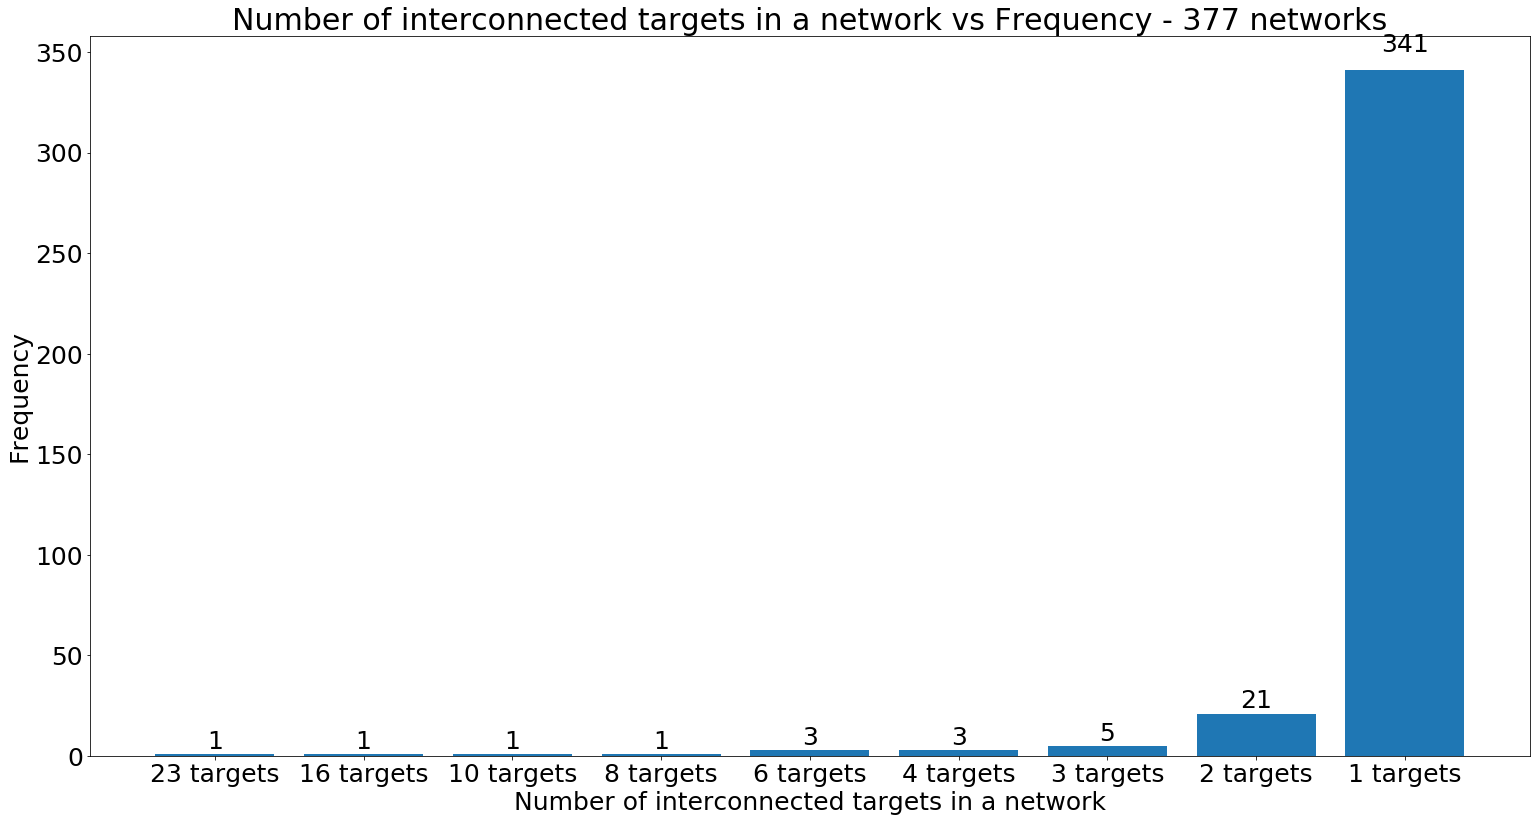

In [91]:
dfTemp = df['numberTarget'].value_counts()
sortedArray = sorted(dict(dfTemp).items(),reverse = True)

fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
numTarget = [str(i) + ' targets' for i in [i[0] for i in sortedArray]]
frequency = [i[1] for i in sortedArray]
rects1 = ax.bar(numTarget,frequency)
ax.set_title("Number of interconnected targets in a network vs Frequency - 377 networks")
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of interconnected targets in a network')
autolabel(rects1)

# picName = 'Pic/NumTargetConVsFrequency.png'
# fig.savefig(picName, bbox_inches="tight")
plt.show()

### number of targets connected via employer relationship

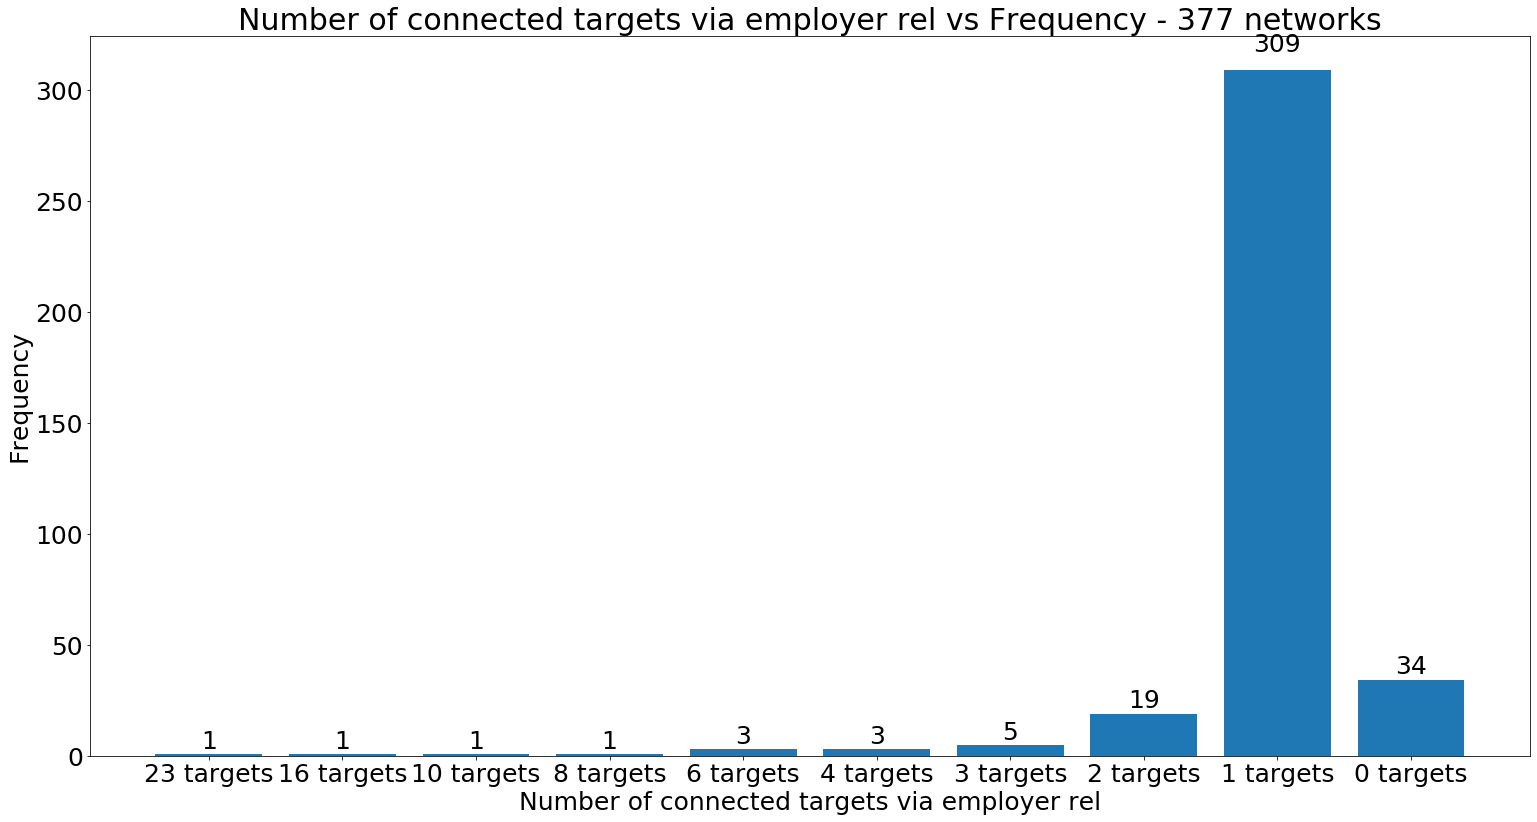

In [90]:
dfTemp = df['numTargetConAsEmployer'].value_counts()
sortedArray = sorted(dict(dfTemp).items(),reverse = True)

fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
numTarget = [str(i) + ' targets' for i in [i[0] for i in sortedArray]]
frequency = [i[1] for i in sortedArray]
rects1 = ax.bar(numTarget,frequency)
ax.set_title("Number of connected targets via employer rel vs Frequency - 377 networks")
ax.set_ylabel('Frequency')
ax.set_xlabel("Number of connected targets via employer rel")
autolabel(rects1)

# picName = 'Pic/NumConEmployerVsFrequency.png'
# fig.savefig(picName, bbox_inches="tight")
plt.show()

### whether targets share contact/email/address

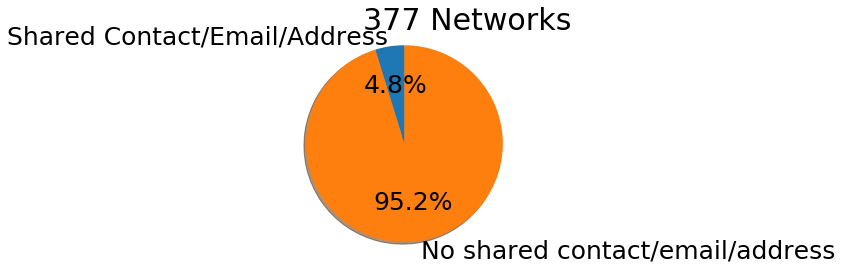

In [76]:
numShared = df.query('targetSharingContactOrAddress==1').shape[0]
numNoShared = df.shape[0] - numShared

#plot pie chart
labels = "Shared Contact/Email/Address", "No shared contact/email/address"
sizes = [numShared, numNoShared]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('377 Networks', loc = 'right')
picName = 'Pic/SharedContactPie.png'
fig1.savefig(picName, bbox_inches="tight")
plt.show()

### Number of connected STR

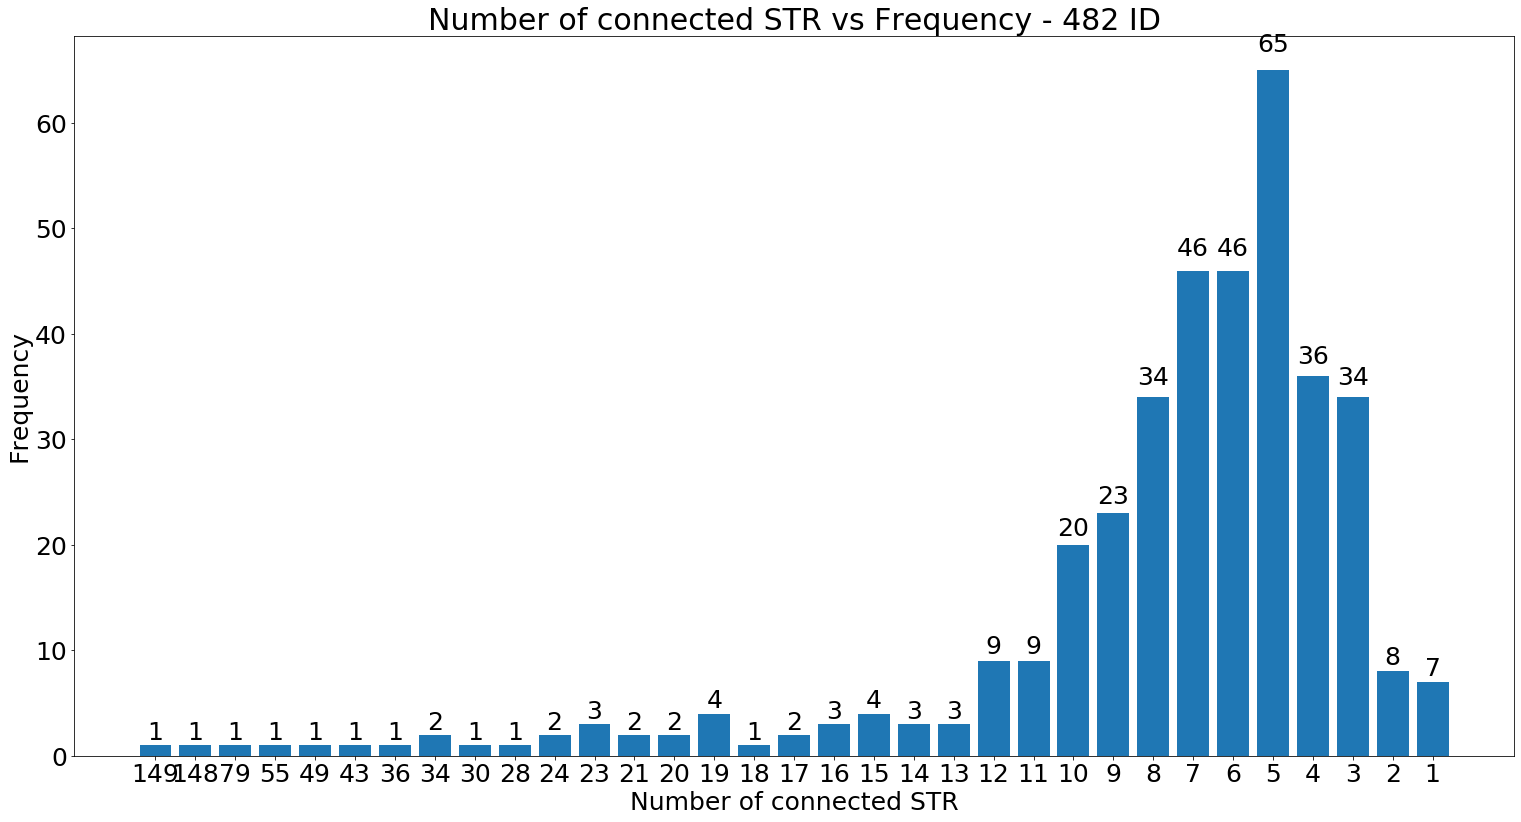

In [89]:
dfTemp = df['numStr'].value_counts()
sortedArray = sorted(dict(dfTemp).items(),reverse = True)

fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
numTarget = [str(i) for i in [i[0] for i in sortedArray]]
frequency = [i[1] for i in sortedArray]
rects1 = ax.bar(numTarget,frequency)
ax.set_title("Number of connected STR vs Frequency - 377 Networks")
ax.set_ylabel('Frequency')
ax.set_xlabel("Number of connected STR")
autolabel(rects1)

# picName = 'Pic/NumSTRConVsFrequency.png'
# fig.savefig(picName, bbox_inches="tight")
plt.show()

### Scores

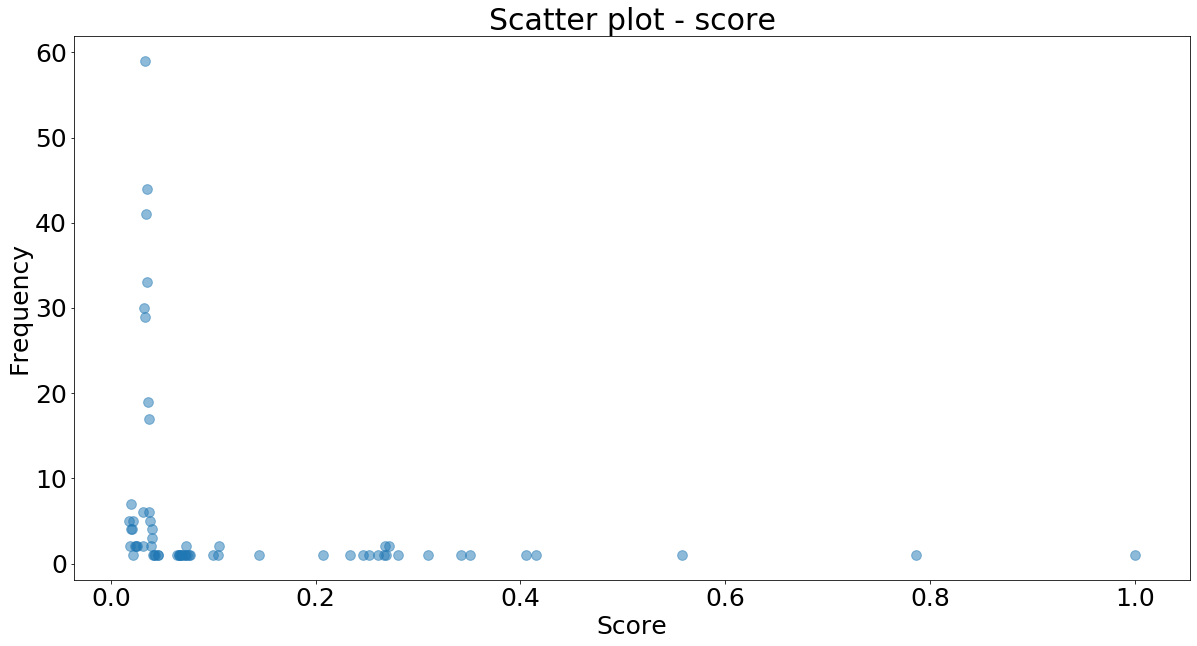

In [100]:
area = np.pi*30
scoreDict = dict(df['Score'].value_counts())

fig = plt.figure(figsize=(20,10))
plt.scatter(x = scoreDict.keys(), y = scoreDict.values(), s = area,  alpha = 0.5)
plt.title('Scatter plot - score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [110]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42)

kmeans.fit(df['Score'].values.reshape(-1, 1))

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

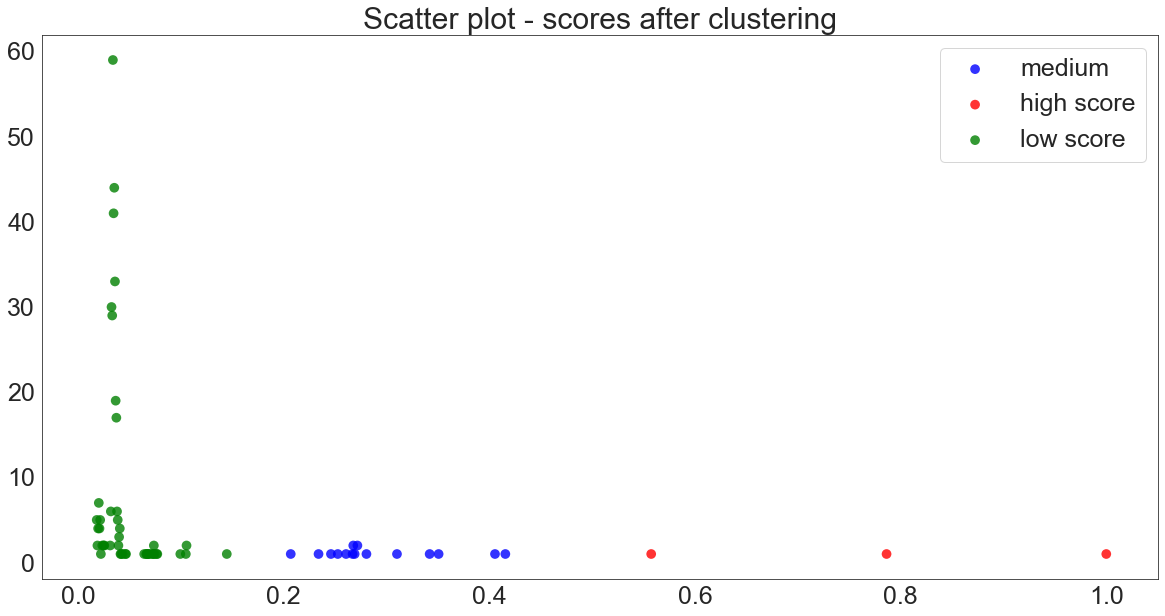

In [164]:
dfTemp = pd.DataFrame(df['Score'].value_counts()).reset_index()
dfTemp.columns = ['Score', 'Frequency']
dfTemp['Label'] = kmeans.predict(dfTemp['Score'].values.reshape(-1, 1))

colors = ("blue", "red", "green")
groups = ("medium", "high score", "low score")
labels = [0, 1, 2]
area = np.pi*30
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)

for label, color, group in zip(labels, colors, groups):
    data = dfTemp[dfTemp['Label'] == label]
    x = data['Score'].values
    y = data['Frequency'].values
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s = area, label=group, )

plt.title('Scatter plot - scores after clustering')
plt.legend(loc=1)
plt.show()

From graph, we can see that there are 3 networks which belong to a cluster of high score (red colour)

### top 3 scoring networks

In [146]:
df.columns

Index(['NeoIds', 'NumNodes', 'NumConnection', 'numStr', 'strAmount',
       'ctrAmount', 'TransIds', 'targetMuleAccountID',
       'targetMuleAccountNeoIds', 'targetMuleAccountESuid', 'numberTarget',
       'connToOffence', 'numConnIsEmployer', 'numConnIsEmployee',
       'contactList', 'sharedContact', 'targetSharingContact',
       'numTargetConAsEmployer', 'targetSharingAddress',
       'targetUidSharingAddress', 'commonAddress',
       'targetSharingContactOrAddress', 'Score'],
      dtype='object')

In [161]:
Latex(r"""
        \begin{align}
        & \underline{\text{Column name}} &\: \qquad & \underline{\text{Description}}
        \newline
        & \text{NumNodes} &\: \qquad & \text{total number of entities in a network}
        \newline
        & \text{NumConnection} &\: \qquad & \text{total number of connection in a network}
        \newline
        & \text{strAmount} &\: \qquad & \text{total amount of STR in a network}
        \newline
        & \text{ctrAmount} &\: \qquad & \text{total amount of CTR in a network}
        \newline
        & \text{numberTarget} &\: \qquad & \text{total number of mule accounts aka targets in a network}
        \newline
        & \text{connToOffence} &\: \qquad & \text{whether a network has connection to selected offences: Fraud, Cheating or Internet Scams/Wire Transfer Fraud}
        \newline
        & \text{numConnIsEmployer} &\: \qquad & \text{total number of connection as employer}
        \newline
        & \text{numTargetConAsEmployer} &\: \qquad & \text{total number of targets connected via employer relationship}
        \newline
        & \text{sharedContact} &\: \qquad & \text{whether entities share contact/email in a network}
        \newline
        & \text{targetSharingContact} &\: \qquad & \text{whether mule accounts aka targets share contact/email in a network}
        \newline
        & \text{targetSharingContactOrAddress} &\: \qquad & \text{whether mule accounts aka targets share contact/email/address in a network}
        \newline
        \end{align}
    """)

<IPython.core.display.Latex object>

In [61]:
def showNetworkTable(ranking):
    print("Rank: %s"%ranking)
    #show row
    df2 = pd.DataFrame(df.sort_values('Score', ascending = False).iloc[ranking - 1]).T
    #show stats
    print("Score - %s"%round(df2['Score'].values[0], 2))
    print("Number of interconnected targets: %s [max - %s]" %(df2['numberTarget'].values[0], maxResultDict['maxNumTarget']))
    print("Number of targets connected via employer relationship: %s [max - %s]" %(df2['numTargetConAsEmployer'].values[0], maxResultDict['maxNumTargetEmployer']))
    print("Whether targets share contact/email/address: %s"%(df2['targetSharingContactOrAddress'].values[0] == 1))
    print("Number of connected STR: %s [max - %s]"%(df2['numStr'].values[0], maxResultDict['maxNumStr']))
    return df2

In [62]:
showNetworkTable(ranking = 1)

Rank: 1
Score - 1.0
Number of interconnected targets: 23 [max - 23]
Number of targets connected via employer relationship: 23 [max - 23]
Whether targets share contact/email/address: True
Number of connected STR: 149 [max - 149]


,NeoIds,NumNodes,NumConnection,numStr,strAmount,ctrAmount,TransIds,targetMuleAccountID,targetMuleAccountNeoIds,targetMuleAccountESuid,...,numConnIsEmployee,contactList,sharedContact,targetSharingContact,numTargetConAsEmployer,targetSharingAddress,targetUidSharingAddress,commonAddress,targetSharingContactOrAddress,Score
4,"[18125827, 14546950, 8155143, 14556166, 172380...",436,435,149,767671,767671,"[2324662, 2324663, 3358295, 3358296, 3364874, ...","[930924135177, 970929136087, 960321136258, 970...","[13445633, 8912393, 9998219, 10327569, 1346216...","{'e-1d5df848-c1e4-42cd-bf3a-c370e0c0514d', 'e-...",...,0,"[14984500, 15187016, 15188242, 15453235, 15469...",True,1,23,1,"[['e-6f6691d5-82c1-4842-b8f0-76b5551d88d1', 'e...",['c0106 jln sejahtera 1 taman desa skudai 8130...,1,1


In [7]:
#network with most scores
dfSubset = df.sort_values('Score', ascending = False)[:1]

#convert data format to json
resultGraph = getNetworkJson(dfSubset, tempGraphDict)

#save json in a html format
htmlFile = "D:/Users/figohjs/Documents/Network/Html/networkMostScore.html"
generateHtml(resultGraph, htmlFile)

D:/Users/figohjs/Documents/Network/Html/networkMostScore.html is saved


In [63]:
showNetworkTable(ranking = 2)

Rank: 2
Score - 0.79
Number of interconnected targets: 16 [max - 23]
Number of targets connected via employer relationship: 16 [max - 23]
Whether targets share contact/email/address: True
Number of connected STR: 148 [max - 149]


,NeoIds,NumNodes,NumConnection,numStr,strAmount,ctrAmount,TransIds,targetMuleAccountID,targetMuleAccountNeoIds,targetMuleAccountESuid,...,numConnIsEmployee,contactList,sharedContact,targetSharingContact,numTargetConAsEmployer,targetSharingAddress,targetUidSharingAddress,commonAddress,targetSharingContactOrAddress,Score
175,"[13467652, 16187404, 14567444, 8054824, 815313...",398,397,148,3.86605e+06,3.86605e+06,"[10228839, 13202690, 13202691, 23897074, 14342...","[980206115257, 860318235601, 670801125798, 751...","[13365027, 13384708, 11870662, 11849383, 13365...","{'e-1d55ffcf-f5a5-4b53-a413-d4a5d8f5eca3', 'e-...",...,2,"[15286765, 15932583, 16003545, 16187404, 16331...",True,1,16,0,NaN,NaN,1,0.786285


In [64]:
#network with 2nd most scores
dfSubset = pd.DataFrame(df.sort_values('Score', ascending = False).iloc[1]).T

#convert data format to json
resultGraph = getNetworkJson(dfSubset, tempGraphDict)

#save json in a html format
htmlFile = "D:/Users/figohjs/Documents/Network/Html/network2ndMostScore.html"
generateHtml(resultGraph, htmlFile)

D:/Users/figohjs/Documents/Network/Html/network2ndMostScore.html is saved


In [65]:
showNetworkTable(ranking = 3)

Rank: 3
Score - 0.56
Number of interconnected targets: 10 [max - 23]
Number of targets connected via employer relationship: 10 [max - 23]
Whether targets share contact/email/address: True
Number of connected STR: 79 [max - 149]


,NeoIds,NumNodes,NumConnection,numStr,strAmount,ctrAmount,TransIds,targetMuleAccountID,targetMuleAccountNeoIds,targetMuleAccountESuid,...,numConnIsEmployee,contactList,sharedContact,targetSharingContact,numTargetConAsEmployer,targetSharingAddress,targetUidSharingAddress,commonAddress,targetSharingContactOrAddress,Score
5,"[5775360, 7651337, 6651914, 4988941, 827407, 7...",3551,3550,79,8.56062e+09,8.56062e+09,"[1341324, 1341326, 1341323, 1736876, 1736875, ...","[751101075317, 890419145610, 861027495379, 920...","[13368738, 10700805, 8598056, 8795726, 1337246...","{'e-82cf5fed-9cf9-482c-9fa1-53d4b248619a', 'e-...",...,0,"[14821947, 14889614, 14889615, 14977374, 15103...",True,1,10,0,NaN,NaN,1,0.557368


In [66]:
#network with 3rd most scores
dfSubset = pd.DataFrame(df.sort_values('Score', ascending = False).iloc[2]).T

#convert data format to json
resultGraph = getNetworkJson(dfSubset, tempGraphDict)

#save json in a html format
htmlFile = "D:/Users/figohjs/Documents/Network/Html/network3rdMostScore.html"
generateHtml(resultGraph, htmlFile)

D:/Users/figohjs/Documents/Network/Html/network3rdMostScore.html is saved
